In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Pandas

### Importing the dataset

In [2]:
# Import marketing.csv 
marketing = pd.read_csv('marketing_new.csv')

# Print the first five rows of the DataFrame
print(marketing.head())

# Print the statistics of all columns
print(marketing.describe())

# Check column data types and non-missing values
print(marketing.info())

# Check the data type of is_retained
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaN           House Ads         True  0

### Adding new columns

In [3]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

### Date columns
The date columns in the marketing DataFrame are being incorrectly read as objects. Changing them to datetime object

In [4]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

### Daily marketing reach by channel
This is crucial to understand how effective our marketing efforts have been over the past month.

In [5]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


### Visualizing daily marketing reach

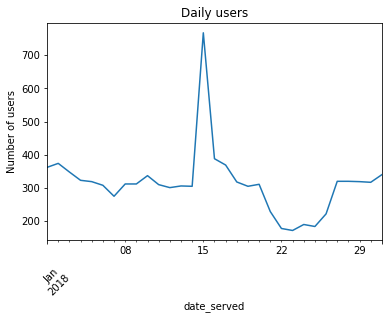

In [6]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()


Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.

## Exploratory Analysis & Summary Statistics

### Calculating conversion rate

In [7]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


Is this a good conversion rate? This will depend heavily on the business. There is no particular number that all marketing teams are trying to reach. It helps to look at historical data to determine whether a conversion rate is what you would expect.

### Calculating retention rate

In [8]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing.converted == True].user_id.nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing.is_retained == True].user_id.nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


### Comparing language conversion rate (I)

In [9]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers.user_id.nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers.converted == True].user_id.nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


### Comparing language conversion rate (II)

In [10]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed').user_id.nunique()

# Group by language_displayed and sum conversions
subscribers = marketing[marketing.converted== True].groupby('language_displayed').user_id.nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### Aggregating by date

In [11]:
# Group by date_served and count unique users
total = marketing.groupby('date_served').user_id.nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing.converted == True].groupby('date_served').user_id.nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


### Visualize conversion rate by language

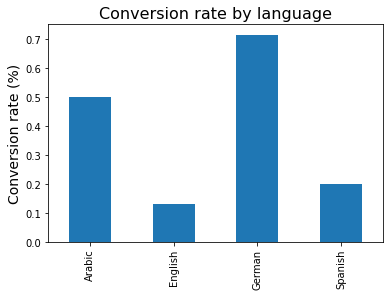

In [12]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language', size = 16)
plt.xlabel('Language', size= 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('', size = 14)

# Display the plot
plt.show()

### Creating daily conversion rate DataFrame
Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [13]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

### Setting up our data to visualize daily conversion

In [14]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

### Visualize daily conversion rate

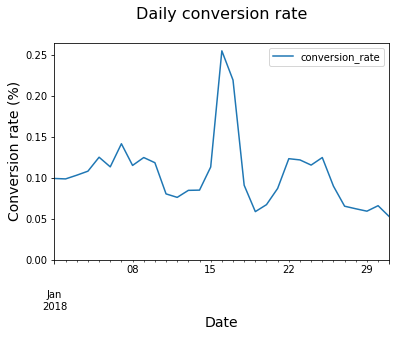

In [15]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

The conversion rate is relatively steady except for one day in January

### Marketing channels across age groups

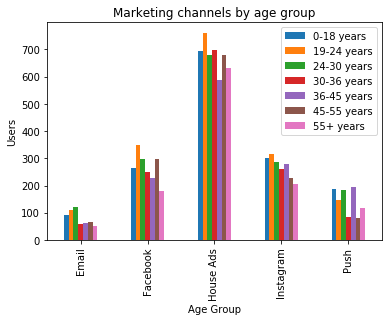

In [16]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns

In [17]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [18]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing.is_retained == True].groupby(['date_subscribed', 
                                                                   'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


### Analyzing retention rates for the campaign

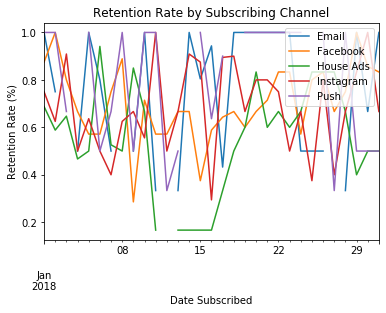

In [19]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(labels = retention_rate_df.columns.values, loc = 'upper right')
plt.show()

## Conversion Attribution


### Building a conversion function
Automating conversion rate calcualtion from above code into a function which takes a dataframe and the columns to groupby


In [20]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe.converted == True].groupby(column_names).user_id.nunique()

    # Total number users
    column_total = dataframe.groupby(column_names).user_id.nunique() 
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


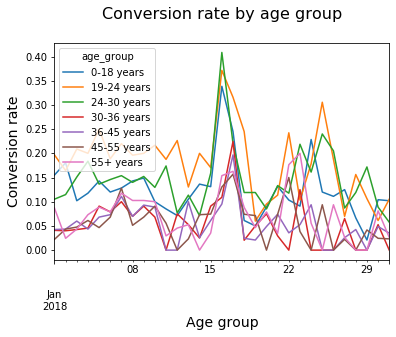

In [21]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Plotting function
To get uncluttered individual graphs for analysis

In [22]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()
        plt.clf()

### Putting it all together

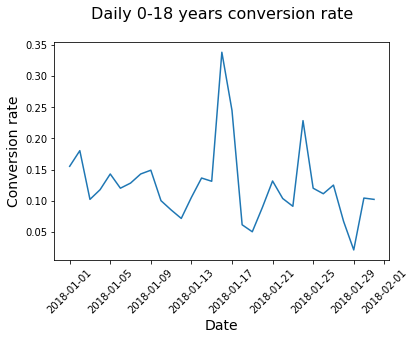

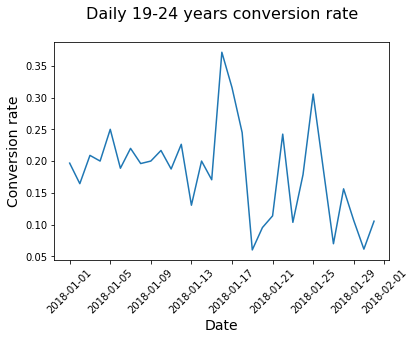

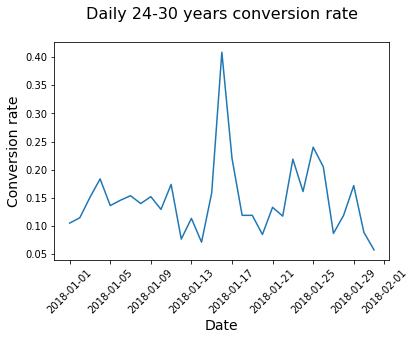

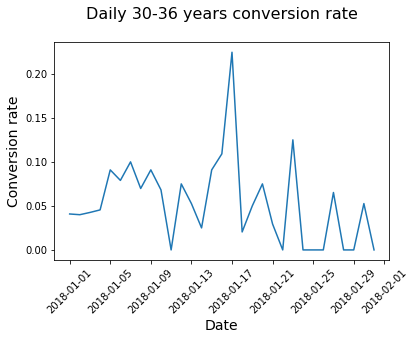

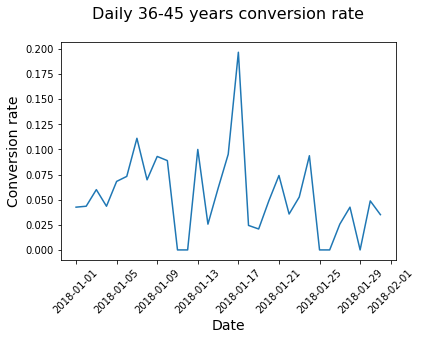

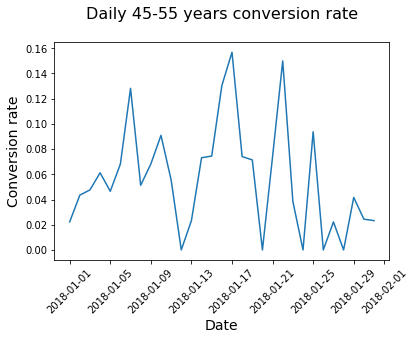

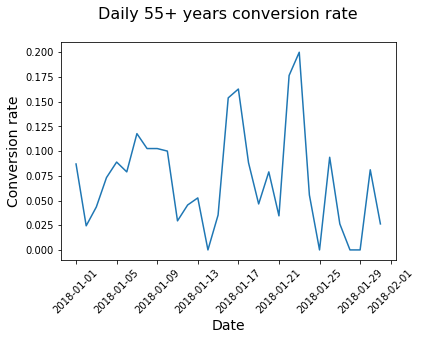

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

##Gives a indivdual plot for all age groups since the unstacking was done at age_group level

### House ads conversion rate

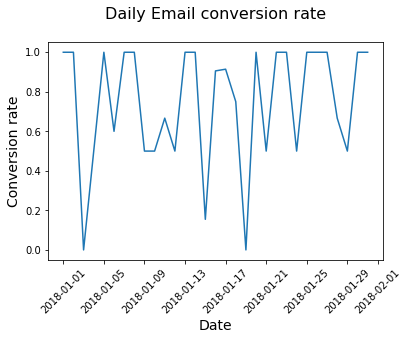

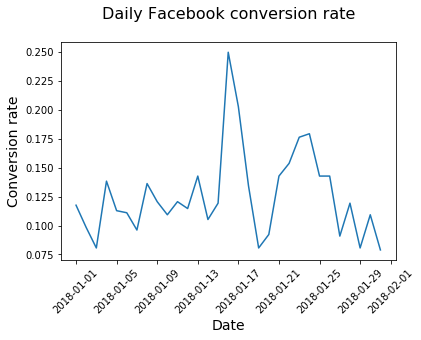

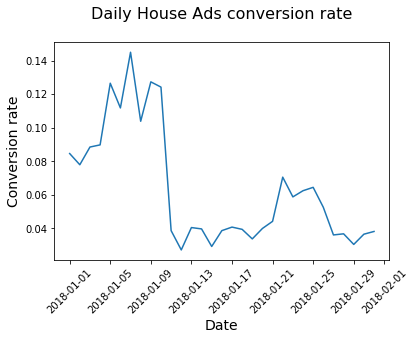

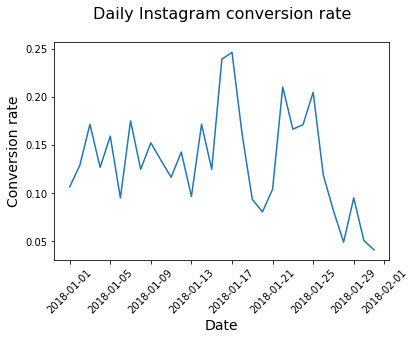

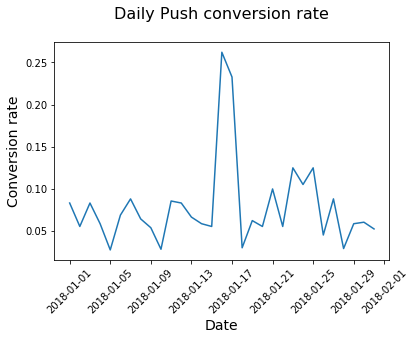

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

### Analyzing House ads conversion rate

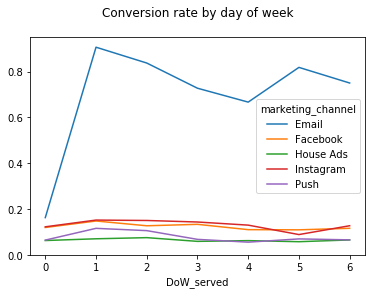

In [25]:
# Add day of week column to channel_marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday

### House ads conversion by language

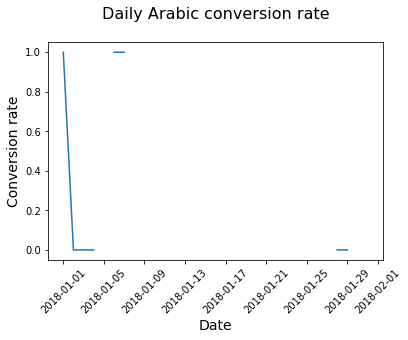

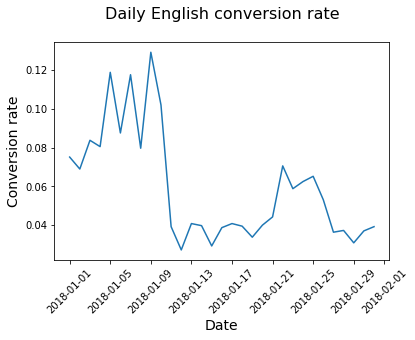

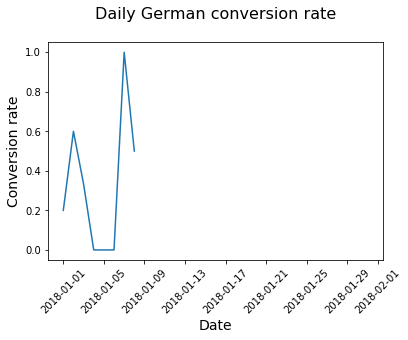

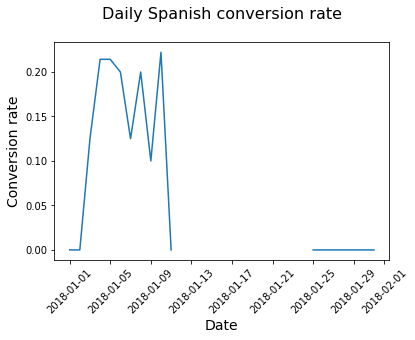

<Figure size 432x288 with 0 Axes>

In [26]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing.marketing_channel == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served',  'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

 As observed, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

### Creating a DataFrame for house ads

In [27]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'], 'Yes', 'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Confirming house ads error
Calculating what percentage of users were not being served ads in the right language and plotting the results

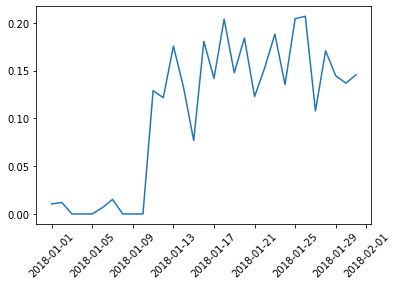

In [28]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['No']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()


It is clear that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

### Setting up conversion indexes

In [29]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])
print(lang_conv*100)
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']
# This index helps us evaluate how well our marketing assets typically convert users for each lang compared to english.
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)


language_displayed
Arabic     50.000000
English     9.909281
German     44.444444
Spanish    16.666667
Name: user_id, dtype: float64
Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Now that i've created indexes for each language compared with English, you can assess what conversion rate should have been during the rest of the month.

### Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

Next here we are calculating the total number of users and actual conversions each day


In [30]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
pd.set_option('precision', 0)
# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))
print(converted)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01               2     171      5      11         2      13      1   
2018-01-02               3     200      5      10         0      14      3   
2018-01-03               2     179      3       8         0      15      1   
2018-01-04               2     149      2      14         0      12      0   
2018-01-05             NaN     143      1      14       NaN      17  False   
2018-01-06               3     136      2      11         3      12      0   
2018-01-07               2     117      2      10         2      14      2   
2018-01-08             NaN     138      6      10       NaN      11      3   
2018-01-09             NaN     147    NaN      10       NaN      19    NaN   
2018-01-10             NaN     147      4      18       NaN     

### Creating a DataFrame based on indexes

Build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language

In [31]:
# Create English conversion rate column for affected period
converted = converted.loc['2018-01-11':'2018-01-31']
converted['english_conv_rate'] = converted[('converted','English')]
print(converted.head())

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11               7     133      2      13         0       6      0   
2018-01-12               3     129      4      11         0       3      0   
2018-01-13               6     121      5      16         0       5      1   
2018-01-14               5     131      3      12         0       6      0   
2018-01-15               2     189      4      10         0       6      0   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-11               0                 6  
2018-01-12               1                 3  
2018-01-13               0                 5  
2018-01-14               0                 6  
2018-01-15               0                 6  

### Assessing bug impact
Now I will assess how many subscribers are lost due to the language discrepancy.

In [32]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11': '2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted['converted', 'Spanish'].sum() +converted['converted', 'Arabic'].sum() + converted['converted', 'German'].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(int(lost_subs))

32


## Personalization A/B Test

### Test allocation
Assuming that there are no issues in the randomization process

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  DoW  DoW_served  
0           NaT           House Ads        True        

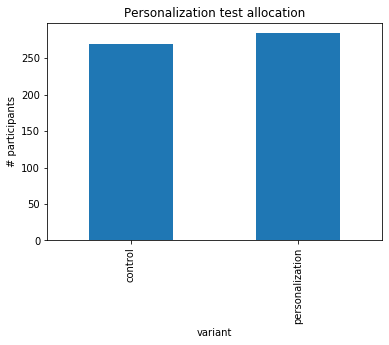

In [33]:
 print(marketing.head())
# Subset the DataFrame
email = marketing[marketing.marketing_channel ==  'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant').user_id.nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

### Comparing conversion rates
Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control

In [34]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant']).converted.max() 
#Here we used max function since converted col is bool and we are interested only in the converted ones
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

print(subscribers_df)
# Drop missing values from the control column
control = subscribers_df.control.dropna()

# Drop missing values from the personalization column
personalization = subscribers_df.personalization.dropna()

print('Control conversion rate:', control.mean())
print('Personalization conversion rate:', personalization.mean())

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True
...            ...             ...
a100007288    True             NaN
a100007289    True             NaN
a100007290    True             NaN
a100007291    True             NaN
a100007293    True             NaN

[553 rows x 2 columns]
Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Creating a lift function

We observe that personalization converted users at a higher rate than the control. Next, we are going to build a lift function to quantify by how much.

In [35]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean  - a_mean)/ a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


### Evaluating statistical significance

In [36]:
from scipy import stats
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

Yes the test is statistically significant as pvalue << 0.05. So we have significance level > 95%

### Building an A/B test segmenting function

In [37]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
    for subsegment in np.unique(marketing[segment]):
        print(subsegment)   
            
        # Limit marketing to email and subsegment      
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [38]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




Found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.